# *Questions* :-

1. Basic exploration :
   1. How many unique breed groups and sizes are in the dataset?
   2. What is the average lifespan of all breeds combined?

2. Grouping & Aggregation :
   3. Which breed group has the highest average friendliness score?
   4. What is the average energy level for each breed size (small, medium, large)?
   5. Which country has the most number of breeds in this dataset?

3. Sorting & Filtering :
   6. Which 3 breeds have the longest lifespan?
   7. List all breeds with trainability score of 5 and shedding ≤ 2.

4. Visualizations :
    8. Plot a bar chart of average lifespan for each breed group.
    9. Create a heatmap showing correlation among numerical traits.
    10. Plot a boxplot comparing barking levels across different sizes.
    11. Plot a scatterplot of trainability vs energy level, color-coded by size.

5. Combining Logic :
   12. Find all breeds that are both highly friendly (≥4) and low shedding (≤2).
   12. Find the top 3 most trainable breeds from non-sporting group.
   13. Create a column family_friendly_score as: friendliness + trainability - barking. Then sort top 5 breeds.
   14. Find the correlation between trainability and lifespan.
   15. Create a total_score for each breed. Formula: friendliness + trainability + energy_level – barking.
   16. Which origin country produces the most high-trainability dogs (score ≥ 4).
   17. Plot: Average trait scores (friendliness, trainability, energy) for each size.
   18. Create a column apartment_friendly. Dogs that are: size = small or medium, barking ≤ 3 and energy_level ≤ 4.
   20. Which breed group has the most “balanced” breeds? Balanced = all 3 traits (friendliness, energy, trainability) between 3 and 4 inclusive.
   21. Cluster breeds manually by score ranges (Low, Medium, High) for total_score.

___

#


# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#


In [3]:
df= pd.read_csv("C:/Users/Pavilion/Downloads/dogs breed.zip")
df.describe()

,energy_level,friendliness,trainability,shedding,barking,lifespan
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.600000,4.400000,3.750000,2.750000,3.250000,12.100000
std,1.142481,0.680557,1.019546,0.786398,1.069924,1.889026
min,2.000000,3.000000,2.000000,1.000000,2.000000,8.000000
25%,3.000000,4.000000,3.000000,2.000000,2.000000,10.750000
50%,3.500000,4.500000,4.000000,3.000000,3.000000,12.500000
75%,5.000000,5.000000,5.000000,3.000000,4.000000,13.250000
max,5.000000,5.000000,5.000000,4.000000,5.000000,15.000000


___

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           20 non-null     object
 1   size            20 non-null     object
 2   energy_level    20 non-null     int64 
 3   friendliness    20 non-null     int64 
 4   trainability    20 non-null     int64 
 5   shedding        20 non-null     int64 
 6   barking         20 non-null     int64 
 7   lifespan        20 non-null     int64 
 8   origin_country  20 non-null     object
 9   breed_group     20 non-null     object
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


___

In [4]:
df.head(5)

,breed,size,energy_level,friendliness,trainability,shedding,barking,lifespan,origin_country,breed_group
0,Labrador Retriever,large,5,5,5,3,3,12,Canada,sporting
1,Chihuahua,small,4,3,2,2,5,14,Mexico,toy
2,German Shepherd,large,5,4,5,4,4,10,Germany,herding
3,Beagle,medium,4,5,3,3,5,13,England,hound
4,Poodle (Standard),medium,3,5,5,2,2,14,Germany/France,non-sporting


___

In [6]:
df.shape

(20, 10)

*In the dataset, there are total 20 rows and 10 columns.* 

___

#

# **1) Basic Exploration :-**

**A.** How many unique breed groups and sizes are in the dataset?

In [11]:
df[['breed_group', 'size']].nunique()

breed_group    6
size           3
dtype: int64

*There are **20** unique breed groups and **3** unique sizes in the dataset.*

___

**B.** What is the average lifespan of all breeds combined?

In [8]:
df['lifespan'].mean()

np.float64(12.1)

*The average lifeapan of all breeds combined is **12.1**.*

___

#


# **2) Grouping and Aggregation :-** 

**C.** Which breed group has the highest average friendliness score?

In [17]:
df.groupby('breed_group')['friendliness'].mean().sort_values(ascending=False).head(1)

breed_group
sporting    5.0
Name: friendliness, dtype: float64

***Sporting** breed group has the highest average friendliness score of 5.*

___

**D.** What is the average energy level for each breed size (small, medium, large)?

In [18]:
df.groupby('size')['energy_level'].mean()

size
large     4.375
medium    3.200
small     3.000
Name: energy_level, dtype: float64

*The average energy level for each large breed size is- **4.375**, for medium it's-**3.200** and **3.000** is for small.*

___

**E.** Which country has the most number of breeds in this dataset?

In [20]:
df['origin_country'].value_counts().head(1)

origin_country
Germany    6
Name: count, dtype: int64

***Germany** has the most number of breeds in this dataset, that is **6**.*

___

#

# **3) Sorting and Filtering :-**

**F.** Which 3 breeds have the longest lifespan?

In [23]:
df[['breed', 'lifespan']].sort_values(by='lifespan',ascending= False).head(3)

,breed,lifespan
19,Maltese,15
1,Chihuahua,14
4,Poodle (Standard),14


*The top 3 breeds with longest lifespan are- **Maltese**, **Chihuahua** and **Poodle(standard)** .*

___

**G.** List all breeds with trainability score of 5 and shedding ≤ 2.

In [12]:
df['breed'].get(df['trainability']==5 ).get(df['shedding']<=2)

4    Poodle (Standard)
Name: breed, dtype: object

***Poodle(standard)** is the only breed with trainability score 5 and shedding <=2.*

___

#

# **4) Visualisations :-**

**H.** Plot a bar chart of average lifespan for each breed group.

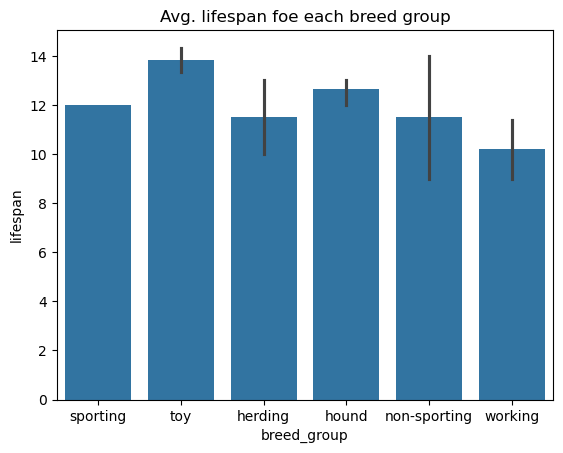

In [51]:
sns.barplot(x='breed_group', y='lifespan', data=df, estimator= 'mean')
plt.title('Avg. lifespan foe each breed group')
plt.show()

***Toy** has the highest average lifespan, followed by **Hound** .*

___

**I.** Create a heatmap showing correlation among numerical traits. 

<Axes: >

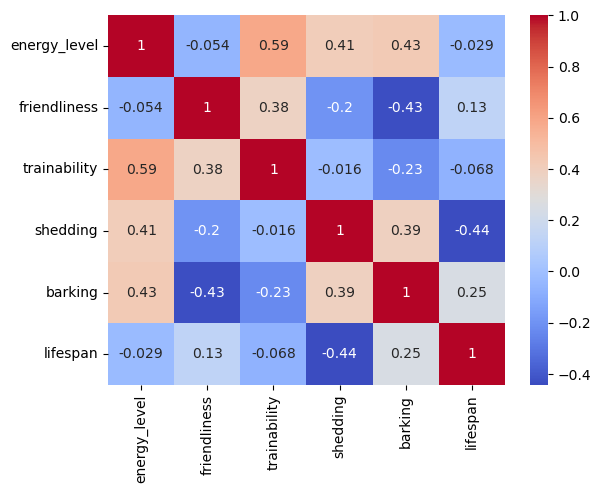

In [56]:
sns.heatmap(df[['energy_level','friendliness','trainability','shedding','barking','lifespan']].corr(), annot=True, cmap='coolwarm')

___

**J.** Plot a boxplot comparing barking levels across different sizes.

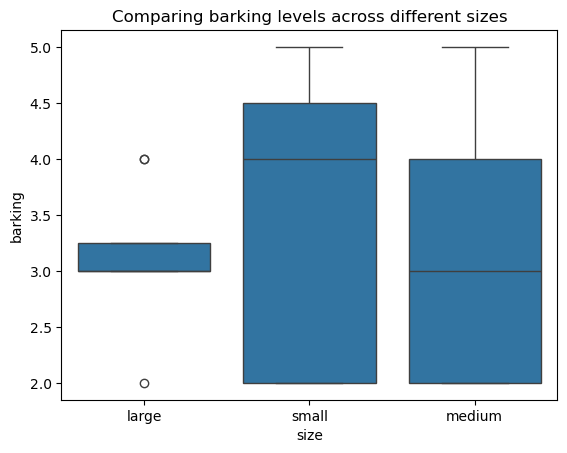

In [57]:
sns.boxplot(x='size',y='barking', data=df)
plt.title('Comparing barking levels across different sizes')
plt.show()

*Small dogs are generally more variable and possibly noisier, while large dogs tend to have more consistent, moderate barking levels, with the occasional outlier.*

___

**K.** Plot a scatterplot of trainability vs energy level, color-coded by size.

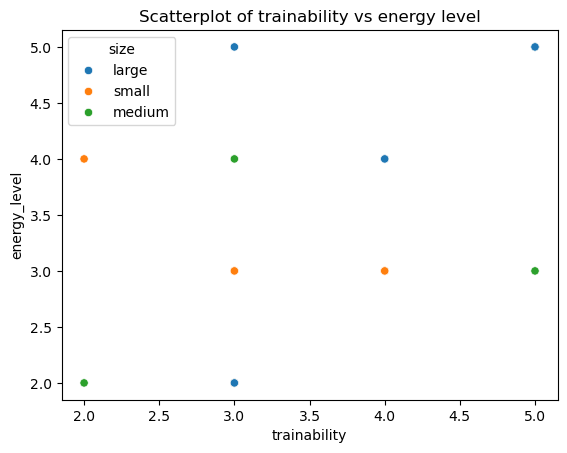

In [19]:
sns.scatterplot(x='trainability' , y='energy_level' , data=df, hue='size' )
plt.title('Scatterplot of trainability vs energy level')
plt.show()

___

#

# **5) Combining logic :-** 

**L.** Find all breeds that are both highly friendly (≥4) and low shedding (≤2). 

In [22]:
df['breed'].get(df['friendliness']>=4).get(df['shedding']<=2)

4                 Poodle (Standard)
5                           Bulldog
9                          Shih Tzu
11    Cavalier King Charles Spaniel
17                Yorkshire Terrier
19                          Maltese
Name: breed, dtype: object

*Breeds that are both highly friendly (≥4) and low shedding (≤2) are- **Poodle (Standard)** , **Bulldog** , **Shih Tzu** , **Cavalier King Charles Spaniel** , **Yorkshire Terrier** , **Maltese** .*

___

**M.** Find the most trainable breeds from non-sporting group.

In [43]:
df[['breed','trainability']].get(df['breed_group']=='non-sporting').sort_values(by='trainability',ascending=False).head(1)

,breed,trainability
4,Poodle (Standard),5


***Poodle(standard)** is the most trainable breeds from non-sporting group.*

___

**N.** Create a column family_friendly_score as: friendliness + trainability - barking. Then sort top 5 breeds.

In [55]:
df['family_freindly_score']= df['friendliness']+df['trainability'] - df['barking']
df[['breed', 'family_freindly_score']].sort_values(by='family_freindly_score',ascending=False).head(5)

,breed,family_freindly_score
4,Poodle (Standard),8
0,Labrador Retriever,7
6,Golden Retriever,7
11,Cavalier King Charles Spaniel,7
19,Maltese,7


___

**O.** Find the correlation between trainability and lifespan.

In [58]:
df['trainability'].corr(df['lifespan'])

np.float64(-0.06831901744448704)

*The correlation between trainability and lifespan is **-0.06831901744448704** .*

___

**P.** Create a total_score for each breed. Formula: friendliness + trainability + energy_level – barking.

In [35]:
df['total_score']=df['friendliness']+ df['trainability'] + df['energy_level'] - df['barking'] 
df.head(2)

,breed,size,energy_level,friendliness,trainability,shedding,barking,lifespan,origin_country,breed_group,apartment_friendly,total_score,score_label
0,Labrador Retriever,large,5,5,5,3,3,12,Canada,sporting,False,12,Medium
1,Chihuahua,small,4,3,2,2,5,14,Mexico,toy,False,4,Low


___

**Q.** Which origin country produces the most high-trainability dogs (score ≥ 4).

In [70]:
df[df['trainability']>=4]['origin_country'].value_counts()

origin_country
Germany           4
Scotland          2
England           2
Canada            1
Germany/France    1
Malta             1
Name: count, dtype: int64

***Germany** produces the most high-trainability dogs (score ≥ 4).*

___

**R.** Plot: Average trait scores (friendliness, trainability, energy) for each size.

Text(0.5, 1.0, 'Average trait scores (friendliness, trainability, energy) for each size')

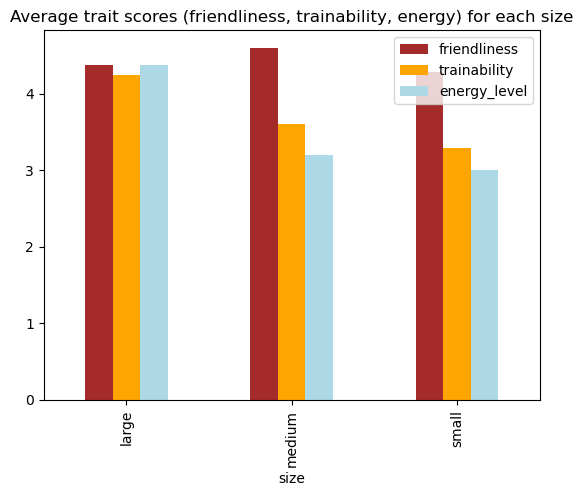

In [20]:
traits=['friendliness', 'trainability', 'energy_level']
df.groupby('size')[traits].mean().plot(kind='bar',color=['brown','orange','lightblue'])
plt.title('Average trait scores (friendliness, trainability, energy) for each size')

___

**S.** Create a column apartment_friendly. Dogs that are: size = small or medium, barking ≤ 3 and energy_level ≤ 4. 

In [24]:
df['apartment_friendly']= ((df['size']!='large') & (df['barking']<=3) & (df['energy_level']<=4))
df.head(2)

,breed,size,energy_level,friendliness,trainability,shedding,barking,lifespan,origin_country,breed_group,apartment_friendly,total_score
0,Labrador Retriever,large,5,5,5,3,3,12,Canada,sporting,False,12
1,Chihuahua,small,4,3,2,2,5,14,Mexico,toy,False,4


___

**T.** Which breed group has the most “balanced” breeds? Balanced = all 3 traits (friendliness, energy, trainability) between 3 and 4 inclusive.

In [30]:
balanced= df[ (df['friendliness'].between(3,4)) & (df['energy_level'].between(3,4)) & (df['trainability'].between(3,4))]
balanced['breed_group'].value_counts()

breed_group
toy        2
hound      1
working    1
Name: count, dtype: int64

***Toy** has the most balanced breeds.*

___

**U.** Cluster breeds manually by score ranges (Low, Medium, High) for total_score.

In [37]:
def score(x):
    if x>=11:return 'High'
    if x>=8:return 'Medium'
    else:return 'Low'

df['score_label']=df['total_score'].apply(score)
df['score_label'].value_counts()

score_label
Medium    8
Low       7
High      5
Name: count, dtype: int64

___

#

# ***INSIGHTS :-***

1. There are **20** unique breed groups and **3** unique sizes in the dataset.
2. The average lifeapan of all breeds combined is **12.1** .
3. **Sporting** breed group has the highest average friendliness score of 5.
4. The average energy level for each large breed size is- 4.375, for medium it's-3.200 and 3.000 is for small.
5. **Germany** has the most number of breeds in this dataset, that is 6.
6. The top 3 breeds with longest lifespan are- **Maltese, Chihuahua and Poodle(standard)** .
7. **Poodle(standard)** is the only breed with trainability score 5 and shedding <=2.
8. **Toy** has the highest average lifespan, followed by Hound .
9. Small dogs are generally more variable and possibly noisier, while large dogs tend to have more consistent, moderate barking levels, with the occasional outlier.
10. **Poodle(standard)** is the most trainable breeds from non-sporting group.
11. The correlation between trainability and lifespan is **-0.06831901744448704**  .
12. **Germany** produces the most high-trainability dogs (score ≥ 4).
13. **Toy** has the most balanced breeds.

___

In [6]:
!pip install openpyxl


In [16]:
df.to_excel("C:/Users/Pavilion/OneDrive/Documents/dogs_data_cleaned.xlsx", index=False)
